#  Statisfaction Analysis

>  Satisfaction of a user is dependent on user engagement and experience, the followings are based on the engagement analysis + the experience analysis


In [1]:
# importing libraries used to data representation and 
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
import sys
 
# adding scripts folder to the system path
sys.path.insert(0, '../scripts/')

In [4]:
import PlotUtils as pu
import DataUtils as du

In [5]:
# read the dataset
db = pd.read_csv('../data/cleaned_telcom_data_final.csv')
db.tail()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
122595,"7,277,825,670,196,679,680.00",4/29/2019 7:28,451.00,4/30/2019 6:02,214.00,"81,230.00","208,202,201,200,072.00","33,650,688,697.00","35,483,109,451,938.00",D20434A,...,"16,191,667.00","11,763,428.00","17,883,703.00","19,678,161.00","526,609,673.00","9,197,207.00","3,264,510.00","13,487,416.00","57,628,851.00","574,175,259.00"
122596,"7,349,883,264,234,609,664.00",4/29/2019 7:28,483.00,4/30/2019 10:41,187.00,"97,970.00","208,201,908,153,249.00","33,663,449,963.00","35,660,508,296,467.00",D10223C,...,"13,877,234.00","8,288,284.00","19,350,146.00","21,293,148.00","626,893,062.00","4,735,033.00","712,180,387.00","2,457,758.00","39,135,081.00","666,648,844.00"
122597,"13,114,483,573,367,300,096.00",4/29/2019 7:28,283.00,4/30/2019 10:46,810.00,"98,249.00","208,201,711,161,187.00","33,621,890,103.00","35,721,209,870,907.00",T51102A,...,"22,660,510.00","1,855,903.00","9,963,942.00","5,065,760.00","553,539,484.00","13,394,316.00","121,100,856.00","11,314,729.00","34,912,224.00","592,786,405.00"
122598,"13,114,483,573,367,300,096.00",4/29/2019 7:28,696.00,4/30/2019 10:40,327.00,"97,910.00","208,202,101,098,075.00","33,619,622,058.00","86,186,204,011,457.00",L88342B,...,"8,817,106.00","8,305,402.00","3,322,253.00","13,172,589.00","352,536,971.00","2,529,475.00","814,713,113.00","1,406,930.00","29,626,096.00","371,895,920.00"
122599,"13,042,425,979,269,199,872.00",4/26/2019 7:25,499.00,4/25/2019 0:01,499.00,"74,989.75","208,201,402,778,052.00","33,626,320,676.00","35,182,310,355,840.00",D41377B,...,"11,634,072.50","11,009,410.13","11,626,851.72","11,001,754.82","422,044,702.60","8,288,398.11","421,100,544.19","8,264,799.42","15,812,228.00","422,598,741.00"


In [6]:
db.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)'

### Aggregate per customer id (MSISDN/Number), the following information
- Average TCP retransmission
- Average RTT
- Handset type
- Average throughput



In [7]:
per_cust = pd.DataFrame()

per_cust['MSISDN'] = db.groupby('MSISDN/Number').groups.keys()

per_cust['handset_type'] = pd.DataFrame(db.groupby('MSISDN/Number')['Handset Type']
     .agg(handset_type = lambda x: list(x)[0] )).reset_index()['handset_type']


column_names = [('TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)'),
                ('Avg RTT DL (ms)', 'Avg RTT UL (ms)'), 
                ('Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)')]

new_names = [ 'average_tcp', 'average_rtt', 'average_throughput']


for ind in range(len(column_names)):
    
    per_cust['total_dl_data'] = pd.DataFrame(db.groupby('MSISDN/Number')[column_names[ind][0]]
         .agg(total_ul_data = 'sum')).reset_index()['total_ul_data'] 
    per_cust['total_ul_data'] = pd.DataFrame(db.groupby('MSISDN/Number')[column_names[ind][1]]
                 .agg(total_dl_data = 'sum')).reset_index()['total_dl_data']

    per_cust[new_names[ind]] = per_cust[['total_dl_data','total_ul_data']].sum(axis=1)


per_cust['session_frequency'] = pd.DataFrame(db.groupby('MSISDN/Number')['IMSI']
     .agg(session_frequency = 'count')).reset_index()['session_frequency']


per_cust['session_duration'] = pd.DataFrame(db.groupby('MSISDN/Number')['Dur. (ms)']
     .agg(session_duration = 'sum')).reset_index()['session_duration']



per_cust['total_ul_data'] = pd.DataFrame(db.groupby('MSISDN/Number')['Total UL (Bytes)']
     .agg(total_ul_data = 'sum')).reset_index()['total_ul_data'] 
per_cust['total_dl_data'] = pd.DataFrame(db.groupby('MSISDN/Number')['Total DL (Bytes)']
             .agg(total_dl_data = 'sum')).reset_index()['total_dl_data']

per_cust['total_dl_and_ul_data'] = per_cust[['total_dl_data','total_ul_data']].sum(axis=1)


per_cust = per_cust.drop(columns=['total_dl_data', 'total_ul_data'])

per_cust.tail(20)

,MSISDN,handset_type,average_tcp,average_rtt,average_throughput,session_frequency,session_duration,total_dl_and_ul_data
92700,"33,789,837,548.00",Apple iPhone 8 Plus (A1897),"3,811,982.50",38.00,128.00,1,"227,852.00","287,627,699.00"
92701,"33,789,859,804.00",Apple iPhone 6S (A1688),"4,080,428.00",57.00,"63,208.00",1,"33,395.00","330,513,882.00"
92702,"33,789,878,384.00",Apple iPhone 6 (A1586),"88,711.50",56.00,"15,961.00",1,"47,989.00","610,571,467.00"
92703,"33,789,880,185.00",Huawei P20 Lite Huawei Nova 3E,"3,811,982.50",38.00,60.00,1,"159,795.00","748,977,075.00"
92704,"33,789,880,296.00",Samsung Galaxy J3 (Sm-J330),"3,811,982.50",51.00,101.00,1,"175,746.00","91,725,373.00"
92705,"33,789,881,186.00",Apple iPhone 6 (A1586),"11,828,704.50",216.00,"50,764.00",4,"702,234.00","1,869,162,407.00"
92706,"33,789,888,146.00",Apple iPhone X (A1901),"3,811,982.50",67.00,94.00,1,"135,558.00","505,648,078.00"
92707,"33,789,890,972.00",Samsung Galaxy S9,"3,811,982.50",51.00,149.00,1,"173,035.00","852,939,331.00"
92708,"33,789,912,614.00",Samsung Galaxy S9 Plus (Sm-G965F),"148,839.00",67.00,"60,153.00",1,"44,199.00","902,088,414.00"
92709,"33,789,914,862.00",Samsung Galaxy J6,"3,811,982.50",51.00,65.00,1,"98,294.00","534,066,910.00"


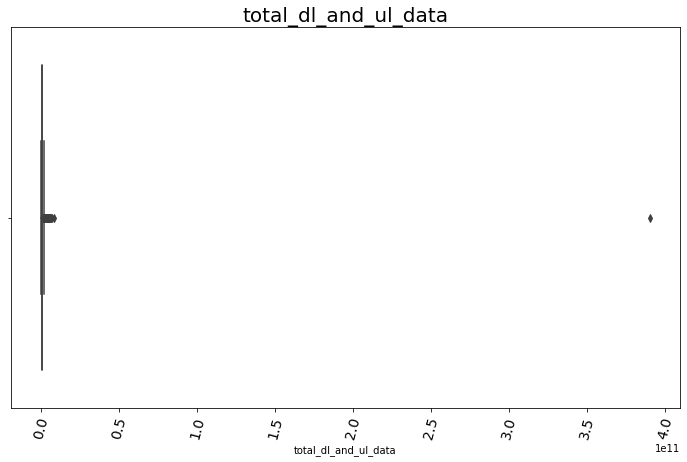

In [8]:
pu.plot_box(per_cust, "total_dl_and_ul_data", "total_dl_and_ul_data")

In [9]:
per_cust = du.remove_outlier(per_cust, 'total_dl_and_ul_data')


Old Shape:  (92720, 8)
New Shape:  (89031, 8)


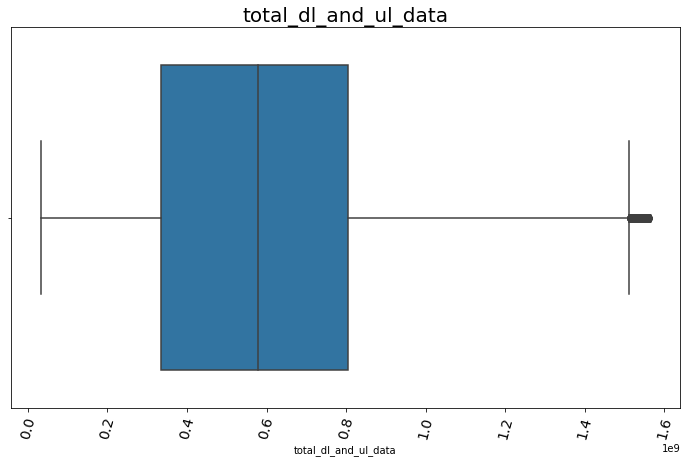

In [10]:

pu.plot_box(per_cust, "total_dl_and_ul_data", "total_dl_and_ul_data")

### Segment users into groups of experiences

In [11]:
# scale / Normalize each metric
x = per_cust.iloc[:,[2,3, 4]].values
print(x.shape)
xscaled_data = pd.DataFrame()

lb = LabelEncoder()
# scaled_data['handset_type'] = lb.fit_transform(per_cust['handset_type'])

scaler = StandardScaler()
xscaled_features = scaler.fit_transform(x)
xscaled_data['average_tcp'] = xscaled_features[:][:,0]
xscaled_data['average_rtt'] = xscaled_features[:][:,1]
xscaled_data['average_throughput'] = xscaled_features[:][:,2]
xscaled_data.tail()

(89031, 3)


,average_tcp,average_rtt,average_throughput
89026,-0.04,-0.01,5.47
89027,-0.04,-0.13,-0.45
89028,-0.04,-0.11,-0.45
89029,-0.04,-0.11,-0.45
89030,-0.04,-0.11,-0.45


In [12]:
xkmeans = KMeans(
       init = "k-means++",
       n_clusters=3,
       n_init=10,
       max_iter=300,
       random_state=0 )

In [13]:
xlabel = xkmeans.fit(xscaled_data)

In [14]:
xscaled_data['label'] = xkmeans.labels_
xscaled_data.tail()

,average_tcp,average_rtt,average_throughput,label
89026,-0.04,-0.01,5.47,2
89027,-0.04,-0.13,-0.45,0
89028,-0.04,-0.11,-0.45,0
89029,-0.04,-0.11,-0.45,0
89030,-0.04,-0.11,-0.45,0


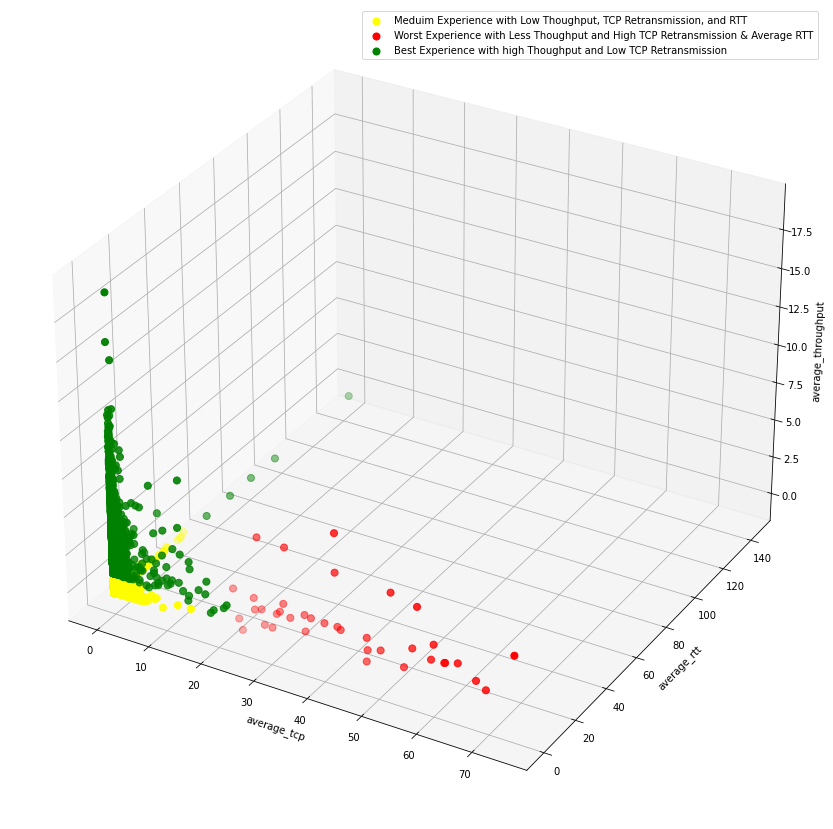

In [15]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
           xscaled_data[xscaled_data['label'] == 0]["average_tcp"],
           xscaled_data[xscaled_data['label'] == 0]["average_rtt"],
           xscaled_data[xscaled_data['label'] == 0]["average_throughput"]
           ,s = 50, c = 'yellow', label = "Meduim Experience with Low Thoughput, TCP Retransmission, and RTT")

ax.scatter(
           xscaled_data[xscaled_data['label'] == 1]["average_tcp"],
           xscaled_data[xscaled_data['label'] == 1]["average_rtt"],
           xscaled_data[xscaled_data['label'] == 1]["average_throughput"]
           ,s = 50, c = 'red', label = "Worst Experience with Less Thoughput and High TCP Retransmission & Average RTT")


ax.scatter(
           xscaled_data[xscaled_data['label'] == 2]["average_tcp"],
           xscaled_data[xscaled_data['label'] == 2]["average_rtt"],
           xscaled_data[xscaled_data['label'] == 2]["average_throughput"]
           ,s = 50, c = 'green', label = "Best Experience with high Thoughput and Low TCP Retransmission")

# ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
ax.set_xlabel("average_tcp")
ax.set_ylabel("average_rtt")
ax.set_zlabel("average_throughput")
ax.legend()
plt.show()

###  classify customers in three groups of engagement

In [16]:
# scale / Normalize each engagement metric
x = per_cust.iloc[:,[5,6,7]].values
print(x.shape)
scaler = StandardScaler()
escaled_features = scaler.fit_transform(x)
escaled_data = pd.DataFrame()
escaled_data['session_frequency'] = escaled_features[:][:,0]
escaled_data['session_duration'] = escaled_features[:][:,1]
escaled_data['total_dl_and_ul_data'] = escaled_features[:][:,2]
escaled_data.tail()

(89031, 3)


,session_frequency,session_duration,total_dl_and_ul_data
89026,1.59,0.71,1.53
89027,-0.47,0.07,-0.35
89028,-0.47,6.87,-1.11
89029,-0.47,1.11,0.00
89030,-0.47,6.80,-1.40


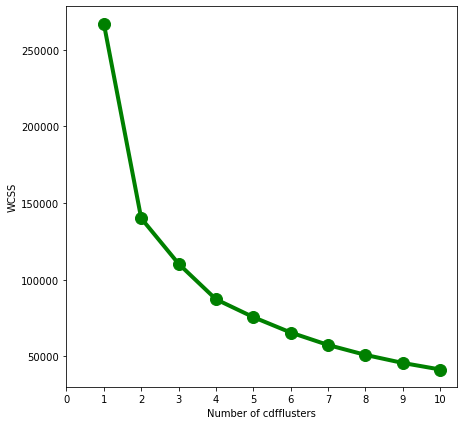

In [17]:

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(escaled_data)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11), WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of cdfflusters")
plt.ylabel("WCSS")
plt.show()

In [18]:
ekmeans = KMeans(
       init = "k-means++",
       n_clusters=3,
       n_init=10,
       max_iter=300,
       random_state=0 )

In [19]:
elabel = ekmeans.fit(escaled_data)

In [20]:
# add the labels to Dataframe
escaled_data['label'] = ekmeans.labels_
escaled_data.tail(10)

,session_frequency,session_duration,total_dl_and_ul_data,label
89021,-0.47,-0.73,-0.06,2
89022,1.59,0.70,2.89,0
89023,-0.47,-0.32,0.16,2
89024,-0.47,0.22,0.35,2
89025,-0.47,0.25,-1.18,1
89026,1.59,0.71,1.53,0
89027,-0.47,0.07,-0.35,1
89028,-0.47,6.87,-1.11,0
89029,-0.47,1.11,0.00,2
89030,-0.47,6.80,-1.40,0


In [21]:
escaled_data.shape

(89031, 4)

In [22]:
per_cust.shape

(89031, 8)

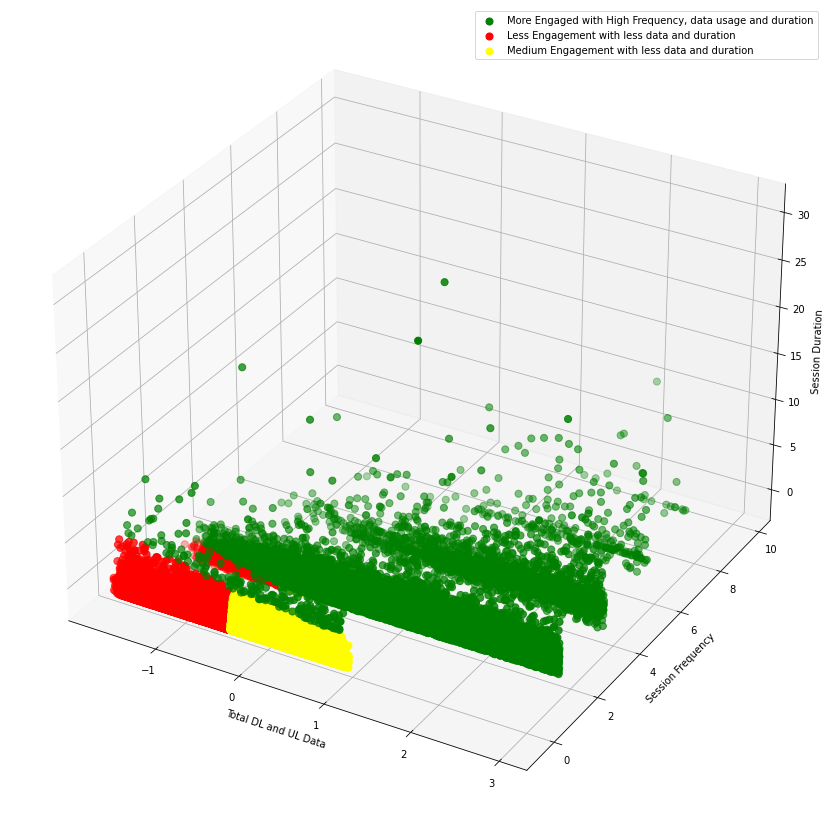

In [23]:
fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
           escaled_data[escaled_data['label'] == 0]["total_dl_and_ul_data"],
           escaled_data[escaled_data['label'] == 0]["session_frequency"],
           escaled_data[escaled_data['label'] == 0]["session_duration"]
           ,s = 50, c = 'green', label = "More Engaged with High Frequency, data usage and duration")

ax.scatter(
           escaled_data[escaled_data['label'] == 1]["total_dl_and_ul_data"],
           escaled_data[escaled_data['label'] == 1]["session_frequency"],
           escaled_data[escaled_data['label'] == 1]["session_duration"]
           ,s = 50, c = 'red', label = "Less Engagement with less data and duration")

ax.scatter(
           escaled_data[escaled_data['label'] == 2]["total_dl_and_ul_data"],
           escaled_data[escaled_data['label'] == 2]["session_frequency"],
           escaled_data[escaled_data['label'] == 2]["session_duration"]
           ,s = 50, c = 'yellow', label = "Medium Engagement with less data and duration")

# ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 100, c = "yellow", label = "centroids")
ax.set_xlabel("Total DL and UL Data")
ax.set_ylabel("Session Frequency")
ax.set_zlabel("Session Duration")
ax.legend()
plt.show()

In [24]:
ekmeans.cluster_centers_

array([[ 1.83433306,  0.93779499,  1.238586  ],
       [-0.44063931, -0.2252689 , -0.94719212],
       [-0.46535556, -0.2379172 ,  0.34311228]])

In [25]:

xkmeans.cluster_centers_

array([[-2.97241393e-02, -8.84237740e-03, -3.37491307e-01],
       [ 4.34829370e+01,  1.21076612e-01,  2.32372425e+00],
       [ 4.99044375e-02,  5.38979210e-02,  2.06414975e+00]])


- a cluster with less Engagement is the second cluster
-  a cluster with bad  is the second Cluster

> so we can calculate the Engagement and Experience score of each user by finding the euclidean distance between the user data point and the 
centriod of those clusters

In [26]:
from sklearn.metrics.pairwise import euclidean_distances

In [27]:
per_cust.tail()

,MSISDN,handset_type,average_tcp,average_rtt,average_throughput,session_frequency,session_duration,total_dl_and_ul_data
92715,"33,789,980,299.00",Apple iPhone 6S (A1688),"3,822,078.50",120.00,"163,079.00",2,"210,389.00","1,094,693,386.00"
92716,"33,789,997,247.00",Apple iPhone 8 Plus (A1897),"3,811,982.50",40.00,116.00,1,"140,988.00","480,307,335.00"
92717,"3,197,020,876,596.00",Quectel Wireless. Quectel Ec25-E,"3,811,982.50",51.00,1.00,1,"877,385.00","232,123,971.00"
92718,"337,000,037,000,919.00",Huawei B525S-23A,"3,811,982.50",51.00,33.00,1,"253,030.00","596,287,824.00"
92719,"882,397,108,489,451.00",Quectel Wireless. Quectel Ec21-E,"3,811,982.50",51.00,2.00,1,"869,844.00","139,153,646.00"


In [28]:
xscaled_data.tail()

,average_tcp,average_rtt,average_throughput,label
89026,-0.04,-0.01,5.47,2
89027,-0.04,-0.13,-0.45,0
89028,-0.04,-0.11,-0.45,0
89029,-0.04,-0.11,-0.45,0
89030,-0.04,-0.11,-0.45,0


In [29]:
scaled_per_cust = pd.DataFrame()
scaled_per_cust['MSISDN'] = list(per_cust['MSISDN'])
scaled_per_cust['handset_type'] = list(per_cust['handset_type'])

scaled_per_cust['average_tcp'] = list(xscaled_data['average_tcp'])
scaled_per_cust['average_rtt'] = list(xscaled_data['average_rtt'])
scaled_per_cust['average_throughput'] = list(xscaled_data['average_throughput'])

scaled_per_cust['session_frequency'] = list(escaled_data['session_frequency'])
scaled_per_cust['session_duration'] = list(escaled_data['session_duration'])
scaled_per_cust['total_dl_and_ul_data'] = list(escaled_data['total_dl_and_ul_data'])
scaled_per_cust.tail()

,MSISDN,handset_type,average_tcp,average_rtt,average_throughput,session_frequency,session_duration,total_dl_and_ul_data
89026,"33,789,980,299.00",Apple iPhone 6S (A1688),-0.04,-0.01,5.47,1.59,0.71,1.53
89027,"33,789,997,247.00",Apple iPhone 8 Plus (A1897),-0.04,-0.13,-0.45,-0.47,0.07,-0.35
89028,"3,197,020,876,596.00",Quectel Wireless. Quectel Ec25-E,-0.04,-0.11,-0.45,-0.47,6.87,-1.11
89029,"337,000,037,000,919.00",Huawei B525S-23A,-0.04,-0.11,-0.45,-0.47,1.11,0.00
89030,"882,397,108,489,451.00",Quectel Wireless. Quectel Ec21-E,-0.04,-0.11,-0.45,-0.47,6.80,-1.40


### Engagement Score

In [30]:
scaled_per_cust['engagement_score'] = euclidean_distances(escaled_data[['session_frequency','session_duration','total_dl_and_ul_data']].values, [ekmeans.cluster_centers_[1]])

In [31]:
scaled_per_cust.head()

,MSISDN,handset_type,average_tcp,average_rtt,average_throughput,session_frequency,session_duration,total_dl_and_ul_data,engagement_score
0,"33,601,001,722.00",Huawei P20 Lite Huawei Nova 3E,-0.04,-0.12,-0.45,-0.47,-0.15,0.87,1.82
1,"33,601,001,754.00",Apple iPhone 7 (A1778),-0.04,-0.14,-0.45,-0.47,0.44,-1.34,0.78
2,"33,601,002,511.00",Apple iPhone 6S (A1688),-0.04,-0.11,-0.45,-0.47,0.02,0.00,0.98
3,"33,601,007,832.00",Apple iPhone 5S (A1457),-0.11,-0.07,-0.44,-0.47,-0.77,-0.53,0.69
4,"33,601,008,617.00",Apple iPhone Se (A1723),-0.04,-0.15,-0.45,-0.47,-1.06,-0.03,1.24


### Experience Score

In [32]:
scaled_per_cust['experience_score'] = euclidean_distances(xscaled_data[['average_tcp','average_rtt','average_throughput']].values, [xkmeans.cluster_centers_[1]])

In [33]:
scaled_per_cust.tail()

,MSISDN,handset_type,average_tcp,average_rtt,average_throughput,session_frequency,session_duration,total_dl_and_ul_data,engagement_score,experience_score
89026,"33,789,980,299.00",Apple iPhone 6S (A1688),-0.04,-0.01,5.47,1.59,0.71,1.53,3.34,43.64
89027,"33,789,997,247.00",Apple iPhone 8 Plus (A1897),-0.04,-0.13,-0.45,-0.47,0.07,-0.35,0.67,43.62
89028,"3,197,020,876,596.00",Quectel Wireless. Quectel Ec25-E,-0.04,-0.11,-0.45,-0.47,6.87,-1.11,7.09,43.62
89029,"337,000,037,000,919.00",Huawei B525S-23A,-0.04,-0.11,-0.45,-0.47,1.11,0.00,1.64,43.62
89030,"882,397,108,489,451.00",Quectel Wireless. Quectel Ec21-E,-0.04,-0.11,-0.45,-0.47,6.80,-1.40,7.04,43.62


### Satisfaction Score

In [34]:
scaled_per_cust['satisfaction_score'] = scaled_per_cust[['experience_score', 'engagement_score']].mean(axis=1)

In [35]:
scaled_per_cust.tail()

,MSISDN,handset_type,average_tcp,average_rtt,average_throughput,session_frequency,session_duration,total_dl_and_ul_data,engagement_score,experience_score,satisfaction_score
89026,"33,789,980,299.00",Apple iPhone 6S (A1688),-0.04,-0.01,5.47,1.59,0.71,1.53,3.34,43.64,23.49
89027,"33,789,997,247.00",Apple iPhone 8 Plus (A1897),-0.04,-0.13,-0.45,-0.47,0.07,-0.35,0.67,43.62,22.14
89028,"3,197,020,876,596.00",Quectel Wireless. Quectel Ec25-E,-0.04,-0.11,-0.45,-0.47,6.87,-1.11,7.09,43.62,25.35
89029,"337,000,037,000,919.00",Huawei B525S-23A,-0.04,-0.11,-0.45,-0.47,1.11,0.00,1.64,43.62,22.63
89030,"882,397,108,489,451.00",Quectel Wireless. Quectel Ec21-E,-0.04,-0.11,-0.45,-0.47,6.80,-1.40,7.04,43.62,25.33


In [36]:
top_sat = scaled_per_cust.sort_values(by =['satisfaction_score'], ascending=False).head(10)

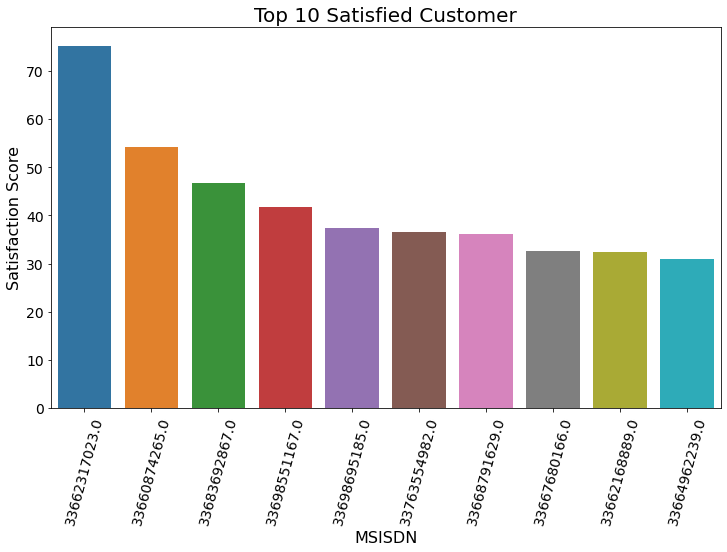

In [37]:
pu.plot_bar_sorted(top_sat,  'MSISDN','satisfaction_score','Top 10 Satisfied Customer', 'MSISDN','Satisfaction Score' )

In [375]:
to_be_saved = scaled_per_cust[:]

### Build Regression Model to predict the satisfaction score

In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
lb = LabelEncoder() 
scaled_per_cust['handset_type'] = lb.fit_transform(scaled_per_cust['handset_type'])

In [127]:
scaled_per_cust.head()

,MSISDN,handset_type,average_tcp,average_rtt,average_throughput,session_frequency,session_duration,total_dl_and_ul_data,engagement_score,experience_score,satisfaction_score
0,"33,601,001,722.00",368,-0.04,-0.12,-0.45,-0.47,-0.15,0.87,1.82,43.62,22.72
1,"33,601,001,754.00",54,-0.04,-0.14,-0.45,-0.47,0.44,-1.34,0.78,43.62,22.20
2,"33,601,002,511.00",48,-0.04,-0.11,-0.45,-0.47,0.02,0.00,0.98,43.62,22.30
3,"33,601,007,832.00",39,-0.11,-0.07,-0.44,-0.47,-0.77,-0.53,0.69,43.68,22.18
4,"33,601,008,617.00",68,-0.04,-0.15,-0.45,-0.47,-1.06,-0.03,1.24,43.62,22.43


In [212]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif

In [246]:
y = pd.DataFrame(scaled_per_cust['satisfaction_score'])


In [247]:
x = scaled_per_cust.drop(['satisfaction_score', 'MSISDN'], axis=1)


In [248]:
y.to_csv('../data/label.csv')

In [249]:
x.to_csv('../data/features.csv')

In [250]:
import pickle

In [251]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from joblib import dump,load
from sklearn.ensemble import RandomForestRegressor

In [254]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=40)

# creating scaler scale var.
norm = MinMaxScaler()
norm2 = MinMaxScaler()
# fit the scal
norm_fit = norm.fit(xtrain)

norm_y = norm2.fit(ytrain)

pickle.dump(norm_fit, open("../models/scaler.pkl", 'wb'))
dump(norm_fit,'../models/scaler.joblib')

# transfromation of trainig data
scaled_xtrain = norm_fit.transform(xtrain)
scaled_ytrain = norm_y.transform(ytrain)

# transformation of testing data
scaled_xtest = norm_fit.transform(xtest)
scaled_ytest = norm_y.transform(ytest)

In [255]:
# create model variable
model = RandomForestRegressor()
  
# fit the model
fit_model = model.fit(scaled_xtrain, scaled_ytrain)  

In [256]:
#predicting our target variable
y_predict = fit_model.predict(scaled_xtest)

In [263]:
y_test = [item for sublist in scaled_ytest for item in sublist]

In [261]:
pre_data = pd.DataFrame()
pre_data['Actual'] = [item for sublist in scaled_ytest for item in sublist]
pre_data['Predicted'] = y_predict
pre_data.head(50)

,Actual,Predicted
0,0.41,0.41
1,0.41,0.41
2,0.43,0.43
3,0.41,0.41
4,0.40,0.40
5,0.42,0.42
6,0.40,0.40
7,0.40,0.40
8,0.43,0.43
9,0.42,0.42


In [264]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [265]:
print("Mean Squared Error : ", mean_squared_error(y_test, y_predict))
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_predict))

Mean Squared Error :  5.4554429370357485e-05
Mean Absolute Error :  0.00011472199407435074


In [268]:
for_k = scaled_per_cust[['engagement_score', 'experience_score']]
for_k.head()

,engagement_score,experience_score
0,1.82,43.62
1,0.78,43.62
2,0.98,43.62
3,0.69,43.68
4,1.24,43.62


In [284]:
kmeans = KMeans(
       init = "k-means++",
       n_clusters=2,
       n_init=10,
       max_iter=300,
       random_state=0 )


In [285]:
label = kmeans.fit(for_k)

In [286]:
for_k['label'] = kmeans.labels_
for_k.head(10)

,engagement_score,experience_score,label
0,1.82,43.62,1
1,0.78,43.62,1
2,0.98,43.62,1
3,0.69,43.68,1
4,1.24,43.62,1
5,0.44,43.62,1
6,2.33,43.54,1
7,4.64,43.55,0
8,1.38,43.62,1
9,1.39,43.62,1


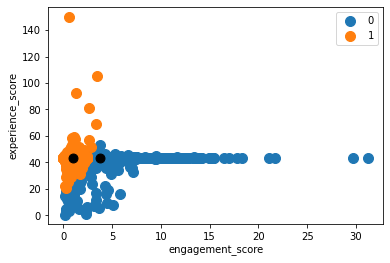

In [294]:
#plotting the results:
centroids = kmeans.cluster_centers_

for i in range(2):
    plt.scatter(for_k[for_k['label'] == i]['engagement_score'], 
                for_k[for_k['label'] == i]['experience_score'], 
                s = 100,
                label = i)
    
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.xlabel('engagement_score')
plt.ylabel('experience_score')
plt.legend()
plt.show()

In [299]:
for_agg = scaled_per_cust[['satisfaction_score', 'experience_score']]
for_agg['label'] = kmeans.labels_
agg_data = pd.DataFrame()

agg_data['average_satisfaction'] = pd.DataFrame(for_agg.groupby('label')['satisfaction_score']
     .agg(session_frequency = 'mean')).reset_index()['session_frequency']


agg_data['average_experience'] = pd.DataFrame(for_agg.groupby('label')['experience_score']
     .agg(satisfaction_score = 'mean')).reset_index()['satisfaction_score']


agg_data.head()

,average_satisfaction,average_experience
0,23.59,43.43
1,22.32,43.60


In [379]:

to_be_saved['handset_manufacturer'] = pd.DataFrame(db.groupby('MSISDN/Number')['Handset Manufacturer']
     .agg(handset_type = lambda x: list(x)[0] )).reset_index()['handset_type']


column_names = [('Social Media UL (Bytes)', 'Social Media DL (Bytes)'),
               ('Google DL (Bytes)', 'Google UL (Bytes)'), ('Email DL (Bytes)', 'Email UL (Bytes)'), 
                ('Youtube DL (Bytes)','Youtube UL (Bytes)'), ('Netflix DL (Bytes)', 'Netflix UL (Bytes)'),
               ('Gaming DL (Bytes)', 'Gaming UL (Bytes)'), ('Other DL (Bytes)', 'Other UL (Bytes)')]

new_names = [ 'social_total', 'google_total', 'email_total', 'youtube_total', 'netflix_total', 'gaming_total',
             'other_total']


for ind in range(len(column_names)):
    
    to_be_saved['total_dl_data'] = pd.DataFrame(db.groupby('MSISDN/Number')[column_names[ind][0]]
         .agg(total_ul_data = 'sum')).reset_index()['total_ul_data'] 
    to_be_saved['total_ul_data'] = pd.DataFrame(db.groupby('MSISDN/Number')[column_names[ind][1]]
                 .agg(total_dl_data = 'sum')).reset_index()['total_dl_data']

    to_be_saved[new_names[ind]] = to_be_saved[['total_dl_data','total_ul_data']].sum(axis=1)

    
to_be_saved = to_be_saved.drop(columns=['total_dl_data', 'total_ul_data'])
to_be_saved.tail()


,MSISDN,handset_type,average_tcp,average_rtt,average_throughput,session_frequency,session_duration,total_dl_and_ul_data,engagement_score,experience_score,satisfaction_score,handset_manufacturer,social_total,google_total,email_total,youtube_total,netflix_total,gaming_total,other_total
89026,"33,789,980,299.00",Apple iPhone 6S (A1688),-0.04,-0.01,5.47,1.59,0.71,1.53,3.34,43.64,23.49,Samsung,"3,552,755.00","11,364,285.00","6,767,204.00","42,265,817.00","53,334,608.00","1,483,298,291.00","493,053,203.00"
89027,"33,789,997,247.00",Apple iPhone 8 Plus (A1897),-0.04,-0.13,-0.45,-0.47,0.07,-0.35,0.67,43.62,22.14,Huawei,"3,094,717.00","12,376,794.00","3,237,247.00","18,763,689.00","12,908,059.00","843,479,795.00","669,576,488.00"
89028,"3,197,020,876,596.00",Quectel Wireless. Quectel Ec25-E,-0.04,-0.11,-0.45,-0.47,6.87,-1.11,7.09,43.62,25.35,Samsung,"1,387,529.00","12,422,498.00","1,880,339.00","21,325,572.00","25,489,296.00","655,190,181.00","568,373,557.00"
89029,"337,000,037,000,919.00",Huawei B525S-23A,-0.04,-0.11,-0.45,-0.47,1.11,0.00,1.64,43.62,22.63,Apple,"2,387,037.00","3,338,737.00","3,356,982.00","23,873,528.00","27,564,999.00","221,583,200.00","170,139,974.00"
89030,"882,397,108,489,451.00",Quectel Wireless. Quectel Ec21-E,-0.04,-0.11,-0.45,-0.47,6.80,-1.40,7.04,43.62,25.33,Samsung,"1,022,721.00","6,393,287.00","2,182,223.00","30,867,250.00","26,002,683.00","755,685,096.00","255,504,924.00"


In [378]:
to_be_saved.to_csv('../data/output.csv')

In [382]:
to_be_saved.shape

(89031, 19)